## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Sep  2 00:39:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [5]:
!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="YSIasBhfu3lxnqNsa6bs")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov9:: 100%|██████████| 20262/20262 [00:07<00:00, 2861.93it/s]


## Custom Training

In [6]:
!yolo task=detect mode=train model=yolov10s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

100% 15.9M/15.9M [00:00<00:00, 127MB/s]
New https://pypi.org/project/ultralytics/8.3.191 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/License-Plate-Recognition-11/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

In [7]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

In [8]:
Image(filename='/content/runs/detect/train/results.png', width=600)

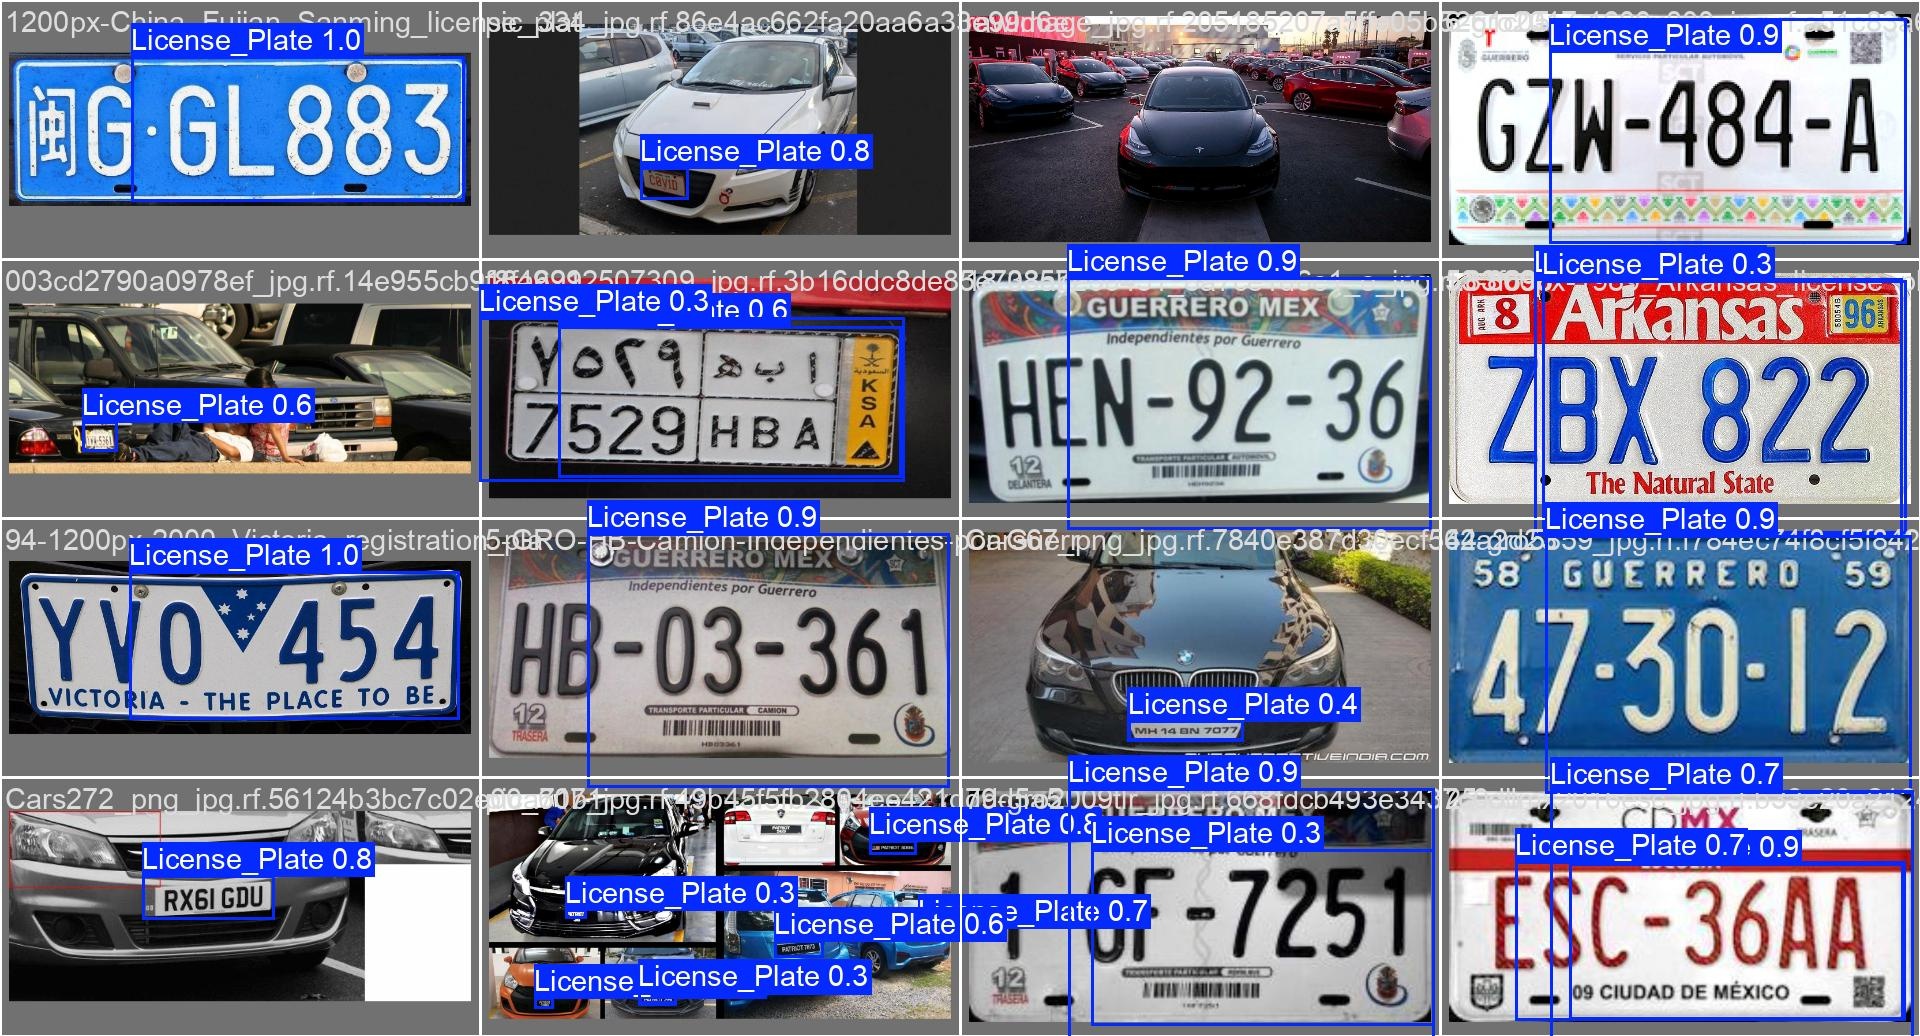

In [9]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 293 layers, 8,035,734 parameters, 0 gradients, 24.4 GFLOPs
val: Scanning /content/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% 2048/2048 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [00:29<00:00,  4.27it/s]
                   all       2048       2195      0.949      0.883      0.954      0.647
Speed: 0.3ms preprocess, 10.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 293 layers, 8,035,734 parameters, 0 gradients, 24.4 GFLOPs

image 1/1020 /content/License-Plate-Recognition-11/test/images/0002a5b67e5f0909_jpg.rf.c8f81ef986e3e99af6f349c200080453.jpg: 608x800 3 License_Plates, 58.2ms
image 2/1020 /content/License-Plate-Recognition-11/test/images/000812dcf304a8e7_jpg.rf.ba32e6c184b3d974abcced6f7c29af6d.jpg: 704x800 2 License_Plates, 48.3ms
image 3/1020 /content/License-Plate-Recognition-11/test/images/0010f4c10f7ab07e_jpg.rf.1844f6dde3b97ed1c762db933bbacaf3.jpg: 608x800 2 License_Plates, 19.8ms
image 4/1020 /content/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg: 608x800 3 License_Plates, 19.0ms
image 5/1020 /content/License-Plate-Recognition-11/test/images/002519f868563098_jpg.rf.29775b804909c1d042ce008c09f033e4.jpg: 544x800 1 License_Plate, 63.9ms
image 6/1020 /content/License-Plate-R

**NOTE:** Let's take a look at few results.

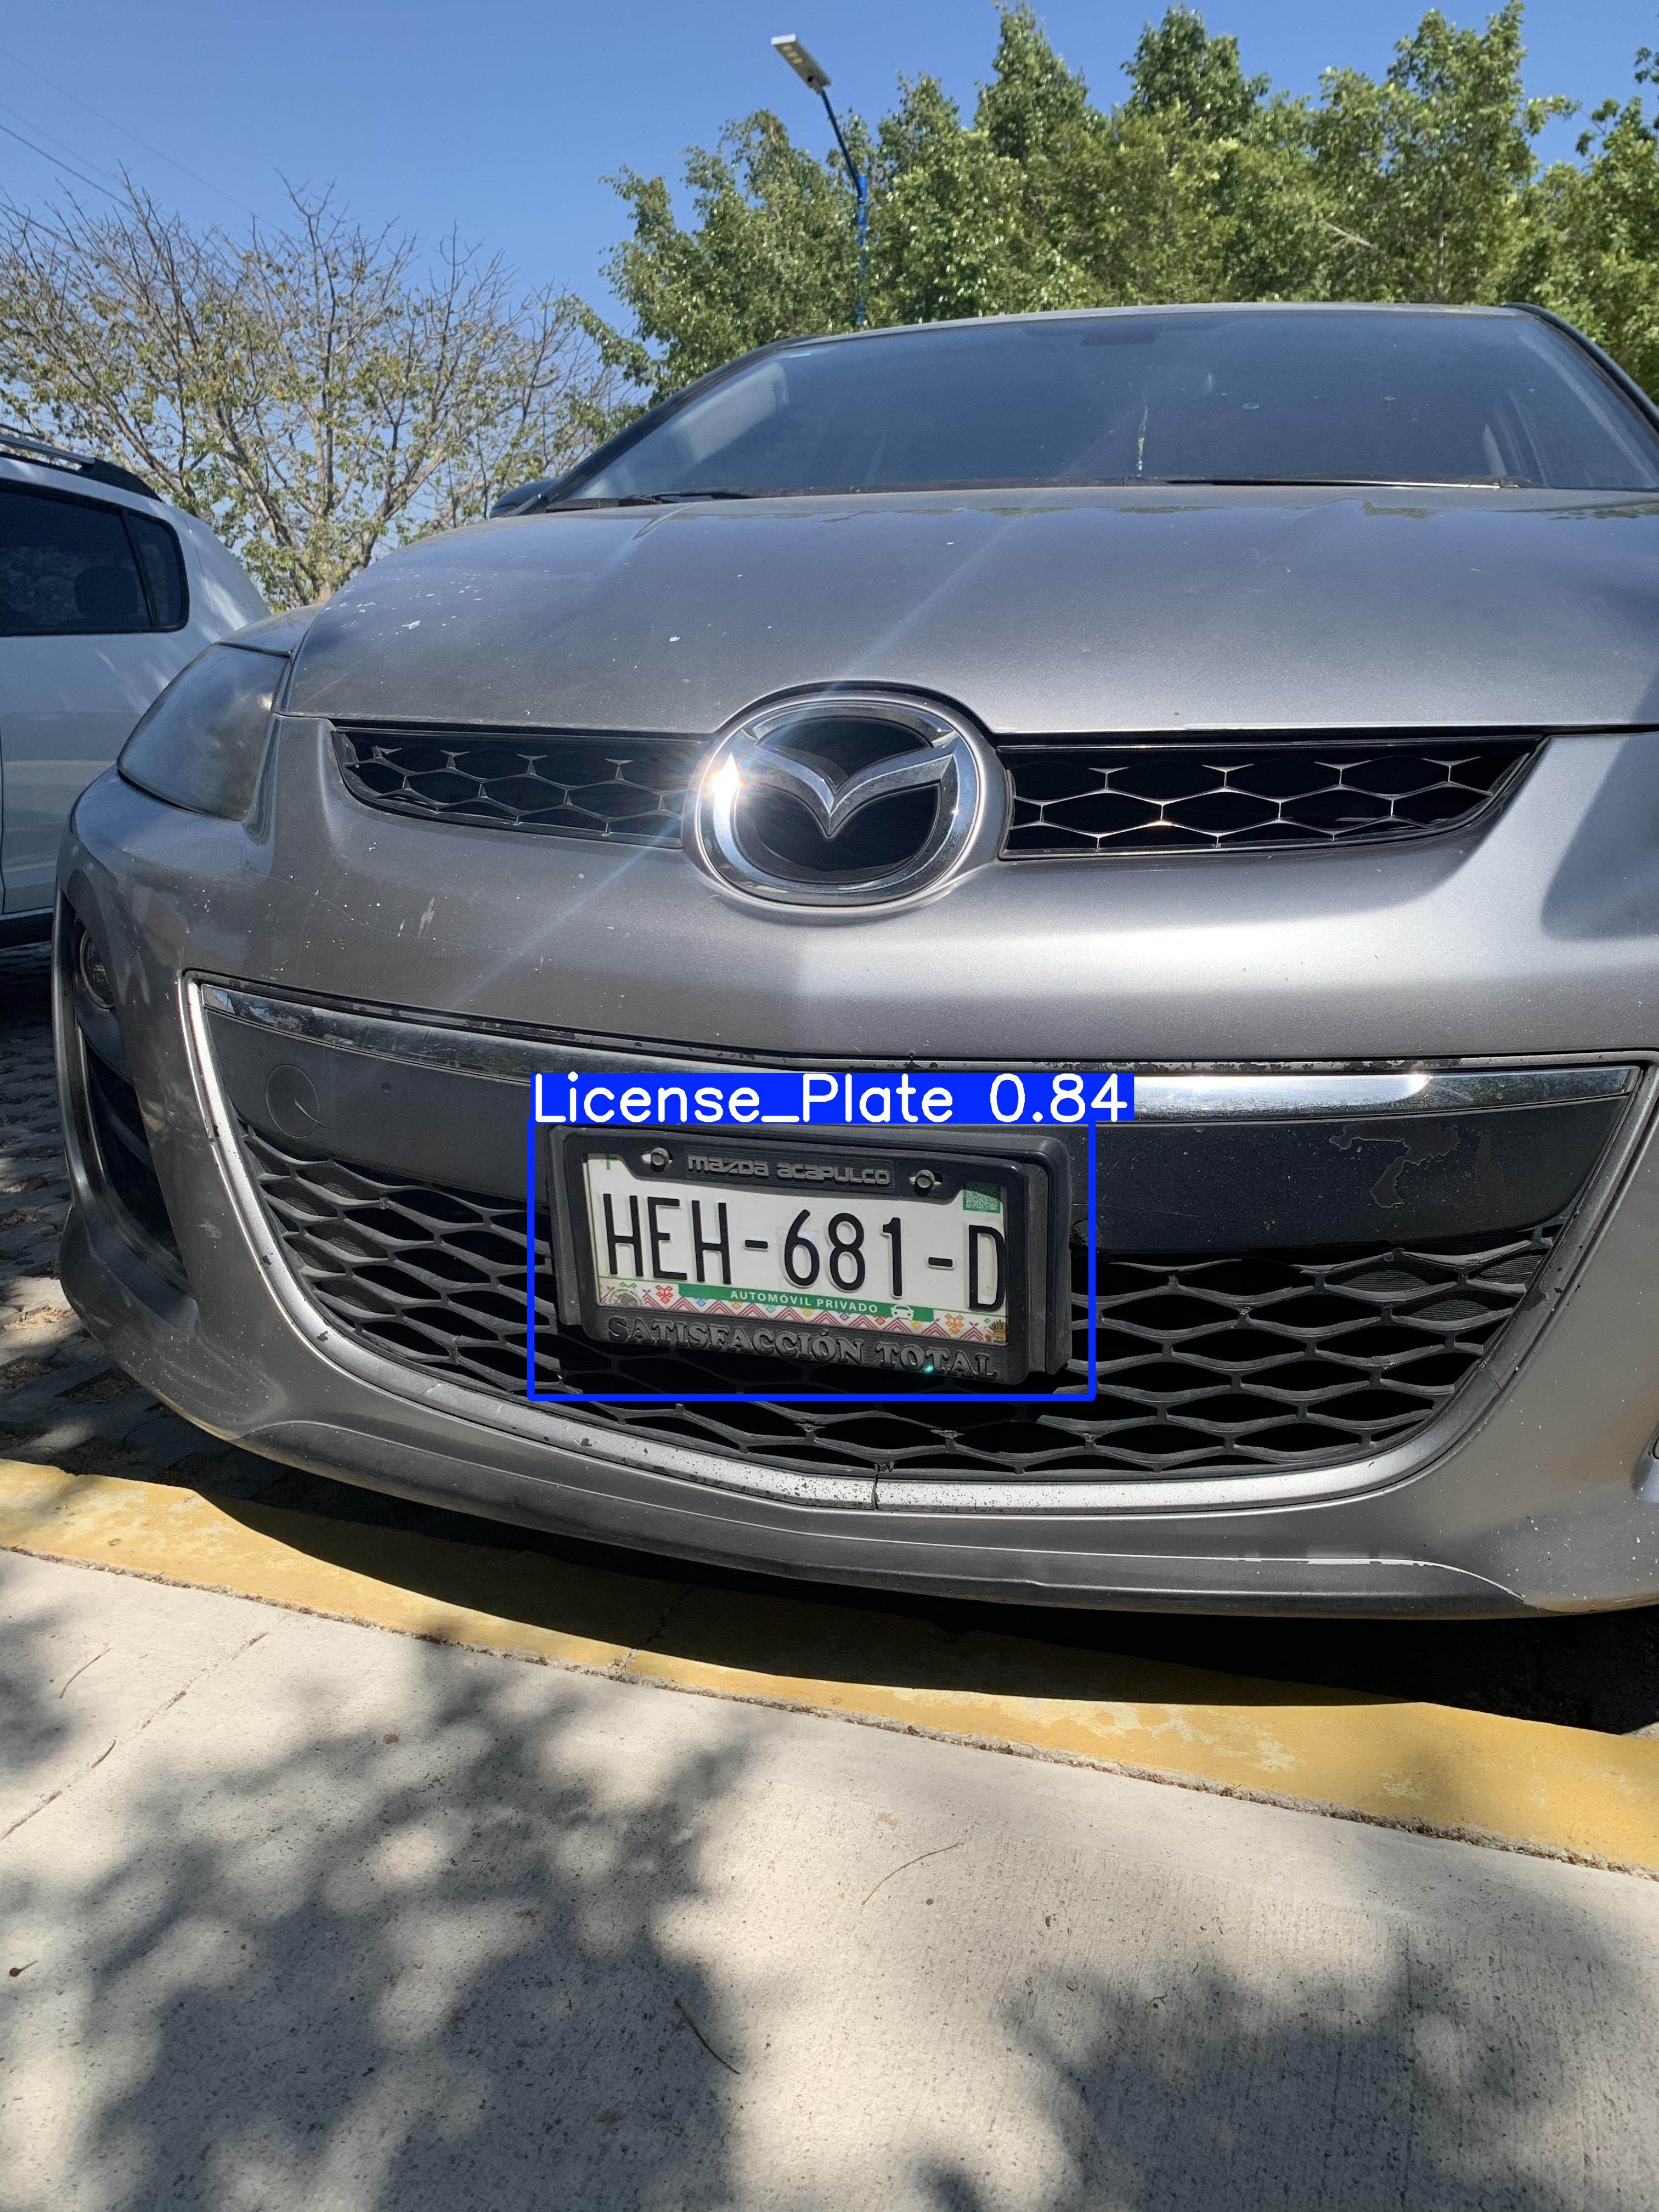

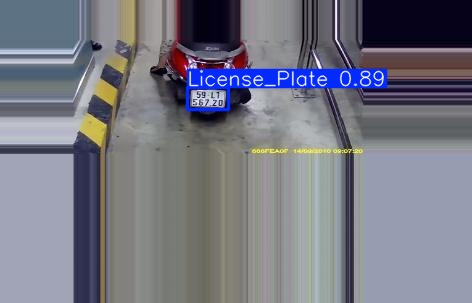

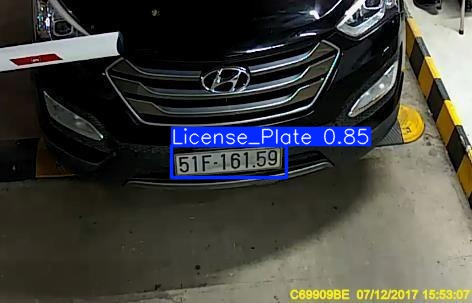

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")